In [ ]:
# Goal: put data into .png format for loading into colab
# New idea: start from the original image and use the rescaling and rotation to do your own 
# data augmentation

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
basedir = "/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/"
# From here figure out what exists in here and load up all info from each one
files = [x[0] for x in os.walk(basedir)]
files = files[1:]
print(files)

['/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/9878-6101', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/9037-3701', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/10219-6101', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/9091-3702', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/8626-3701', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/8447-6104', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/9878-12702', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/8449-12703', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/8998-12705', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/9871-3701', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/9189-1901', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/8333-3701', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/8152-6104', '/Users/beckynevin/CfA_Code/Kinematic_ML/data/numpy_files/8943-6103', '/Users/beckyne

In [2]:

existing_plateifus=[]

for j in range(len(files)):

    existing_plateifus.append(str(re.split('/',files[j])[-1]))
print(len(existing_plateifus))

3357


In [3]:
# Okay got em, now lets try to actualmente look at the data

map_array_ml = np.zeros((len(existing_plateifus),76,76))
for j in range(len(existing_plateifus)):
    stel_vel = np.load(basedir+existing_plateifus[j]+'/stellar_vel.npy')
    map_array_ml[j,:,:] = stel_vel
    '''print(np.shape(stel_vel))
    plt.clf()
    plt.imshow(stel_vel, cmap='RdBu_r')
    plt.colorbar()
    plt.show()
    
    stel_vel_disp = np.load(basedir+existing_plateifus[j]+'/stellar_disp.npy')
    
    plt.clf()
    plt.imshow(stel_vel_disp, cmap='magma')
    plt.colorbar()
    plt.show()
    
    if j >10:
        STOP'''

In [6]:
# Try saving instead as color image using imsave
# Try to find that one useful colormap that sets white = zero

from skimage.transform import resize

import random

n = int(0.1*len(existing_plateifus))
print('select this many', n)

test_set_names = random.sample(existing_plateifus, n) 



for j in range(np.shape(map_array_ml)[0]):

    # From the distribution of values, determine the best velocity to use as vmin and vmax by 
    # getting rid of outliers
    flat = map_array_ml[j].flatten()
    # Calculate percentiles
    quant_5, quant_95 = np.quantile(flat,0.01), np.quantile(flat,0.99)
    
    

    '''plt.hist(map_array_ml[j].flatten(), bins=25)
    plt.axvline(x=quant_5)
    plt.axvline(x=quant_95)
    plt.show()'''
    
    max_q = max(quant_5,quant_95)
    
    
        
        
        
        
    if existing_plateifus[j] in test_set_names:
        plt.imsave("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs_norot/test/1/"+str(existing_plateifus[j])+".png", 
               map_array_ml[j], cmap='RdBu_r', vmin=-max_q, vmax=max_q)
    else:
        
        plt.imsave("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs_norot/train/1/"+str(existing_plateifus[j])+".png", 
               map_array_ml[j], cmap='RdBu_r', vmin=-max_q, vmax=max_q)
    
    # also save the array:
    
    
    #
    

select this many 335


select this many 335


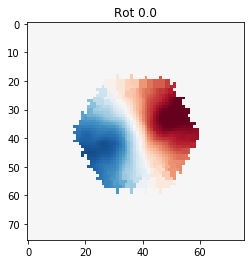

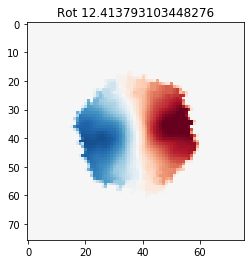

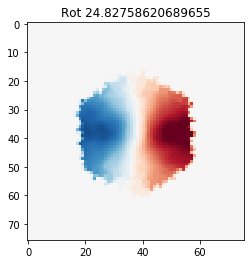

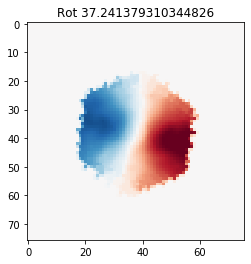

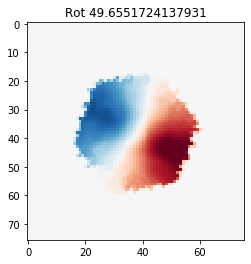

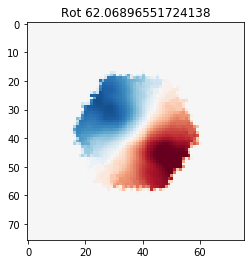

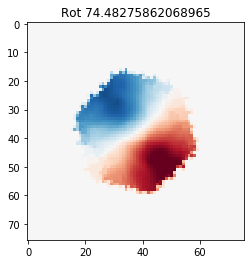

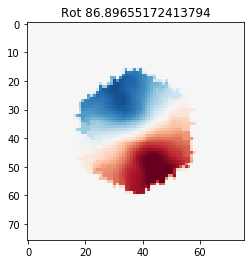

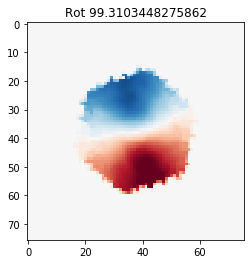

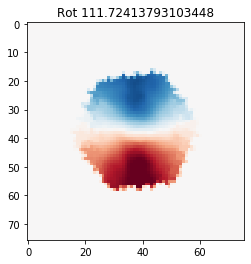

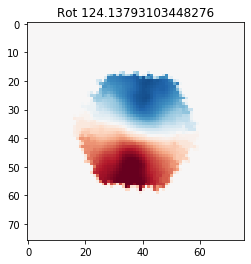

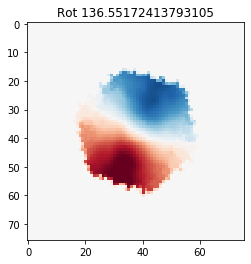

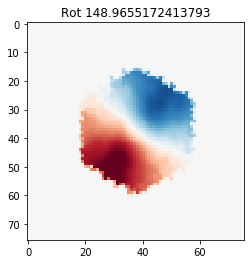

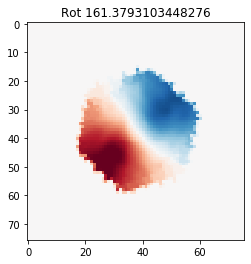

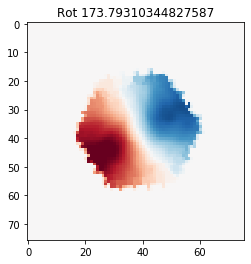

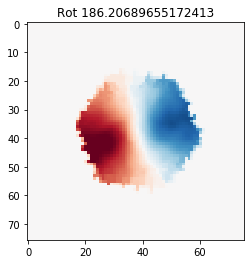

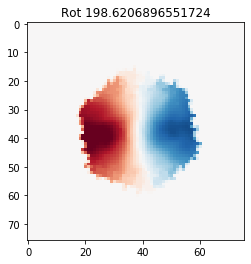

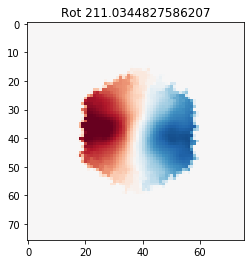

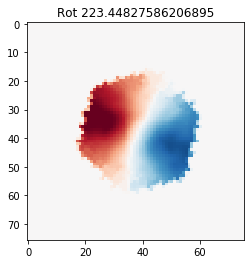

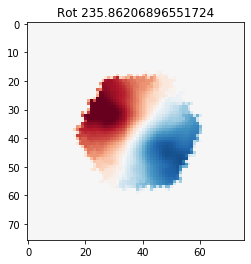

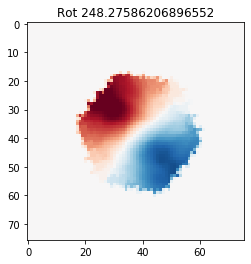

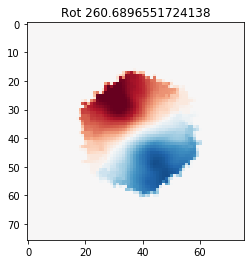

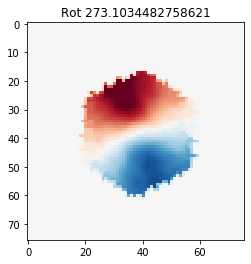

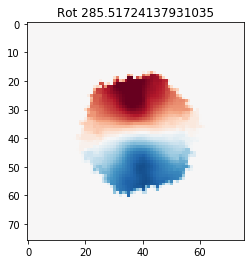

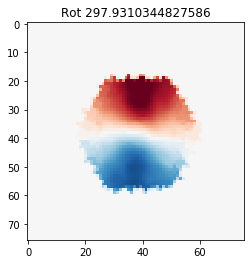

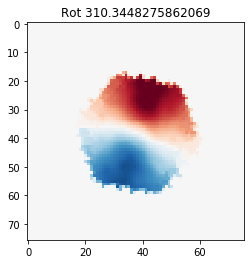

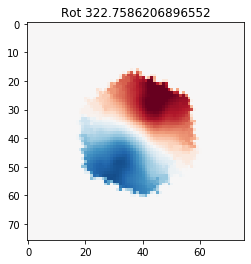

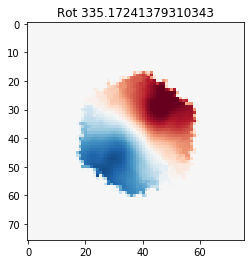

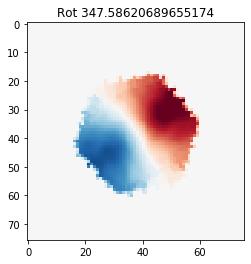

In [36]:
# Try saving instead as color image using imsave
# Try to find that one useful colormap that sets white = zero

from skimage.transform import resize

import random

n = int(0.1*len(existing_plateifus))
print('select this many', n)

test_set_names = random.sample(existing_plateifus, n) 



for j in range(np.shape(map_array_ml)[0]):

    # From the distribution of values, determine the best velocity to use as vmin and vmax by 
    # getting rid of outliers
    flat = map_array_ml[j].flatten()
    # Calculate percentiles
    quant_5, quant_95 = np.quantile(flat,0.01), np.quantile(flat,0.99)
    
    

    '''plt.hist(map_array_ml[j].flatten(), bins=25)
    plt.axvline(x=quant_5)
    plt.axvline(x=quant_95)
    plt.show()'''
    
    max_q = max(quant_5,quant_95)
    
    '''plt.clf()
    plt.imshow(map_array_ml[j], cmap='RdBu_r', vmax=max_q, vmin=-max_q)
    plt.colorbar()
    plt.show()'''
    
    #resized = resize(map_array_ml[j], (76*3,76*3))
    
    '''plt.clf()
    plt.imshow(resized, cmap='RdBu_r', vmax=max_q, vmin=-max_q, interpolation='None')
    plt.colorbar()
    plt.show()'''
    
    # Now flip around n times
    shift_y, shift_x = np.array(map_array_ml[j].shape[:2]) / 2.
    
    
    
    tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
    tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

    
    testing=np.linspace(0,360, 30)
    
    for i in range(len(testing)-1):
        tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(testing[i]))
        rot = transform.warp(map_array_ml[j], (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
        '''plt.clf()
        plt.imshow(map_array_ml[j], cmap='RdBu_r', vmin=-max_q, vmax=max_q)
        plt.show()'''
        if j ==0:
            plt.clf()
            plt.imshow(rot, cmap='RdBu_r', vmin=-max_q, vmax=max_q)
            plt.title('Rot '+str(testing[i]))
            plt.show()
        
        
        
        if existing_plateifus[j] in test_set_names:
            os.system('mkdir /Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/'+str(existing_plateifus[j]))
            #im.save("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/"+str(ifu_name[j])+"/"+str(j)+".png", format='PNG')
            plt.imsave("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/"+str(existing_plateifus[j])+"/"+str(existing_plateifus[j])+"_flip_"+str(testing[i])+".png", 
                   rot, cmap='RdBu_r', vmin=-max_q, vmax=max_q)
        else:
            os.system('mkdir /Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/train/'+str(existing_plateifus[j]))
            #im.save("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/train/"+str(ifu_name[j])+"/"+str(j)+".png", format='PNG')
    
            plt.imsave("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/train/"+str(existing_plateifus[j])+"/"+str(existing_plateifus[j])+"_flip_"+str(testing[i])+".png", 
                   rot, cmap='RdBu_r', vmin=-max_q, vmax=max_q)
    
    # also save the array:
    
    
    #
    

In [7]:
# Maybe unflatten it first?


data = map_array_ml#np.reshape(map_array_ml,(np.shape(map_array_ml)[0],shape,shape))
n_galaxies = np.shape(data)[0]#np.shape(map_array_ml)[0]


MB_matrix = np.zeros(( np.shape(data)[0],data[0,:,:].size))
for i in range(np.shape(data)[0]):
    MB_array = data[i,:,:].flatten()
    MB_arrayStd = 100*(MB_array - MB_array.mean())/MB_array.std()+100
    MB_matrix[i,:] = MB_arrayStd

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


select this many 76
(765, 38, 38)


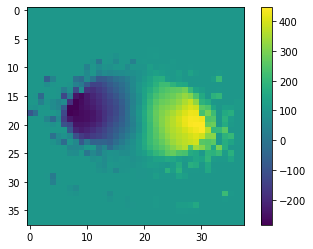

IndexError: list index out of range

In [14]:
# Okay you need to make a separate test and training set here, divide by 10/90
import random

n = int(0.1*len(ifu_name))
print('select this many', n)

test_set_names = random.sample(ifu_name, n) 



MB_matrix_normalized = np.reshape(MB_matrix,(np.shape(data)[0], np.shape(data)[1], np.shape(data)[2]))

print(np.shape(MB_matrix_normalized))
plt.clf()
plt.imshow(MB_matrix_normalized[1])
plt.colorbar()
plt.show()

for j in range(np.shape(data)[0]):
    im = Image.fromarray(MB_matrix_normalized[j])
    im = im.convert("L")
    if ifu_name[j] in test_set_names:
        os.system('mkdir /Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/'+str(ifu_name[j]))
        im.save("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/"+str(ifu_name[j])+"/"+str(j)+".png", format='PNG')
    else:
        os.system('mkdir /Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/train/'+str(ifu_name[j]))
        im.save("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/train/"+str(ifu_name[j])+"/"+str(j)+".png", format='PNG')

(765, 38, 38)


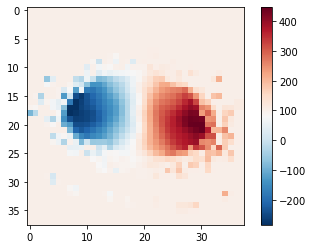

IndexError: list index out of range

In [16]:
# Try saving instead as color images:
# Okay you need to make a separate test and training set here, divide by 10/90
MB_matrix_normalized = np.reshape(MB_matrix,(np.shape(data)[0], np.shape(data)[1], np.shape(data)[2]))

print(np.shape(MB_matrix_normalized))
plt.clf()
plt.imshow(MB_matrix_normalized[1], cmap='RdBu_r')
plt.colorbar()
plt.show()

for j in range(np.shape(data)[0]):
    #im = Image.fromarray(MB_matrix_normalized[j])
    #im = im.convert("L")
    #os.system('mkdir /Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/'+str(ifu_name[j]))
    plt.imsave("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/all_Galzoo/"+str(ifu_name[j])+".png", 
               data[j], cmap='RdBu_r')
    